In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns		
## importamos librerias

In [2]:
from google.colab import files
import io

##cargamos el dataset
uploaded= files.upload()
archivo= io.BytesIO(uploaded["Caracteristicas del automovil y MSRP.csv"])

Saving data.csv to data.csv


In [3]:
df= pd.read_csv("Caracteristicas del automovil y MSRP.csv")
## leemos el archivo
## imprimimos las primeras 5 instancias
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
df.tail()
## imprimimos las ultimas 5 instancias

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


In [5]:
df.info()
## Informacion general del dataset(dimensiones, campos, registros, tipo de dato de los campos, etc)

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [6]:
df.columns
## nombre de las columnas del dataset

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [7]:
df.index
## numero de instancias del dataset, desde que numero hasta que numero es su rango y de cuanto en cuanto es su recorrido.

RangeIndex(start=0, stop=11914, step=1)

In [8]:
df.shape
## numero total de filas y columnas del dataframe

(11914, 16)

In [9]:
df.drop(columns= ['Engine Fuel Type', 'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style', "Popularity"], inplace= True)
## eliminamos las columnas que no nos son utiles en nuestro objetivo

In [10]:
df= df.rename(columns= {"Make (hecho/fabricado en)": "Make"})
df= df.rename(columns= {"Model (modelo)": "Model"})
df= df.rename(columns= {"Year (hecho en el año)": "Year"})
df= df.rename(columns= {"highway MPG": "MPG H"})
df= df.rename(columns= {"city mpg": "mpg C"})
df= df.rename(columns= {"Engine HP": "HP"})
df= df.rename(columns= {"Engine Cylinders": "Cylinders"})
df= df.rename(columns= {"MSRP": "precio"})
df= df.rename(columns= {"Transmission Type": "Transmission"})
df.head()
## renombramos las columnas que tienen nombres un poco incomodos para su codeo por ser demasiado largos o demas motivos

,Make,Model,Year,HP,Cylinders,Transmission,Driven_Wheels,MPG H,mpg C,precio
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [11]:
filas_duplicadas= df[df.duplicated()]
filas_duplicadas.shape
## buscamos las filas que son duplicadas e imprimimos cuantas son.

(989, 10)

In [12]:
df.count()
## contamos por columna la cantidad de instancias con datos

Make             11914
Model            11914
Year             11914
HP               11845
Cylinders        11884
Transmission     11914
Driven_Wheels    11914
MPG H            11914
mpg C            11914
precio           11914
dtype: int64

In [13]:
df= df.drop_duplicates()
df.head()
##desechamos las instancias duplicadas

,Make,Model,Year,HP,Cylinders,Transmission,Driven_Wheels,MPG H,mpg C,precio
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [14]:
df.count()
## volvemos a contar por columna la cantidad de instancias con datos

Make             10925
Model            10925
Year             10925
HP               10856
Cylinders        10895
Transmission     10925
Driven_Wheels    10925
MPG H            10925
mpg C            10925
precio           10925
dtype: int64

In [15]:
df.isnull().sum()
## contamos por columna cuantas instancias contienen datos nulos.

Make              0
Model             0
Year              0
HP               69
Cylinders        30
Transmission      0
Driven_Wheels     0
MPG H             0
mpg C             0
precio            0
dtype: int64

In [16]:
df.isna().sum()

Make              0
Model             0
Year              0
HP               69
Cylinders        30
Transmission      0
Driven_Wheels     0
MPG H             0
mpg C             0
precio            0
dtype: int64

In [17]:
df= df.dropna()
df.count()
## desechamos los datos nulos del dataframe

Make             10827
Model            10827
Year             10827
HP               10827
Cylinders        10827
Transmission     10827
Driven_Wheels    10827
MPG H            10827
mpg C            10827
precio           10827
dtype: int64

In [18]:
print(df.isnull().sum())

Make             0
Model            0
Year             0
HP               0
Cylinders        0
Transmission     0
Driven_Wheels    0
MPG H            0
mpg C            0
precio           0
dtype: int64


In [ ]:
df.nunique(axis=0) 

In [ ]:
# cuales son las marcas que estan en el dataset

marcas= set(df["Make (hecho/fabricado en)"])
tab_marcas=pd.DataFrame(marcas)
tab_marcas

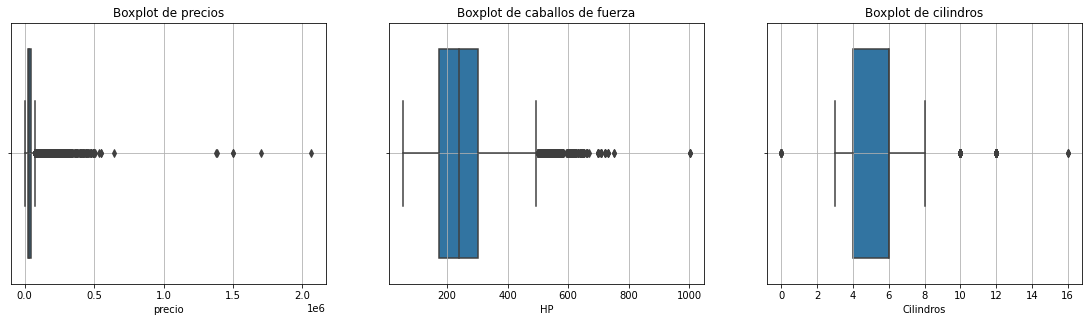

In [19]:
#boxplots y valores atipicos

plt.figure(figsize= (6.4*3,4.8))
plt.subplot(1,3,1)
sns.boxplot(data= df, x = "precio")
plt.xlabel('precio')
plt.title("Boxplot de precios")
plt.grid()

plt.subplot(1,3,2)
sns.boxplot(data= df, x = "HP")
plt.xlabel('HP')
plt.title("Boxplot de caballos de fuerza")
plt.grid()

plt.subplot(1,3,3)
sns.boxplot(data= df, x = "Cylinders")
plt.xlabel('Cilindros')
plt.title("Boxplot de cilindros")
plt.grid()

plt.show()
### buscamos los valores atipicos y realizamos boxplot de las variables q nos interesan

In [20]:
#Un valor atípico es un punto o conjunto de puntos que son diferentes de otros puntos. A veces pueden ser muy altos o muy bajos. 
#A menudo es una buena idea detectar y eliminar los valores atípicos. Porque los valores atípicos son una de las razones principales por las que se obtiene un modelo menos preciso. 
#Por lo tanto, es una buena idea eliminarlos

# IQR score technique (tecnica de puntuacion IQR)

Q1= df.quantile(0.25)
Q3= df.quantile(0.75)
IQR= Q3-Q1
print(IQR)





Year             9.0
HP             130.0
Cylinders        2.0
MPG H            8.0
mpg C            6.0
precio       21327.5
dtype: float64


In [21]:
# eliminar los valores atípicos.
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  


(9191, 10)

Index(['Make', 'Model', 'Year', 'HP', 'Cylinders', 'Transmission',
       'Driven_Wheels', 'MPG H', 'mpg C', 'precio'],
      dtype='object')

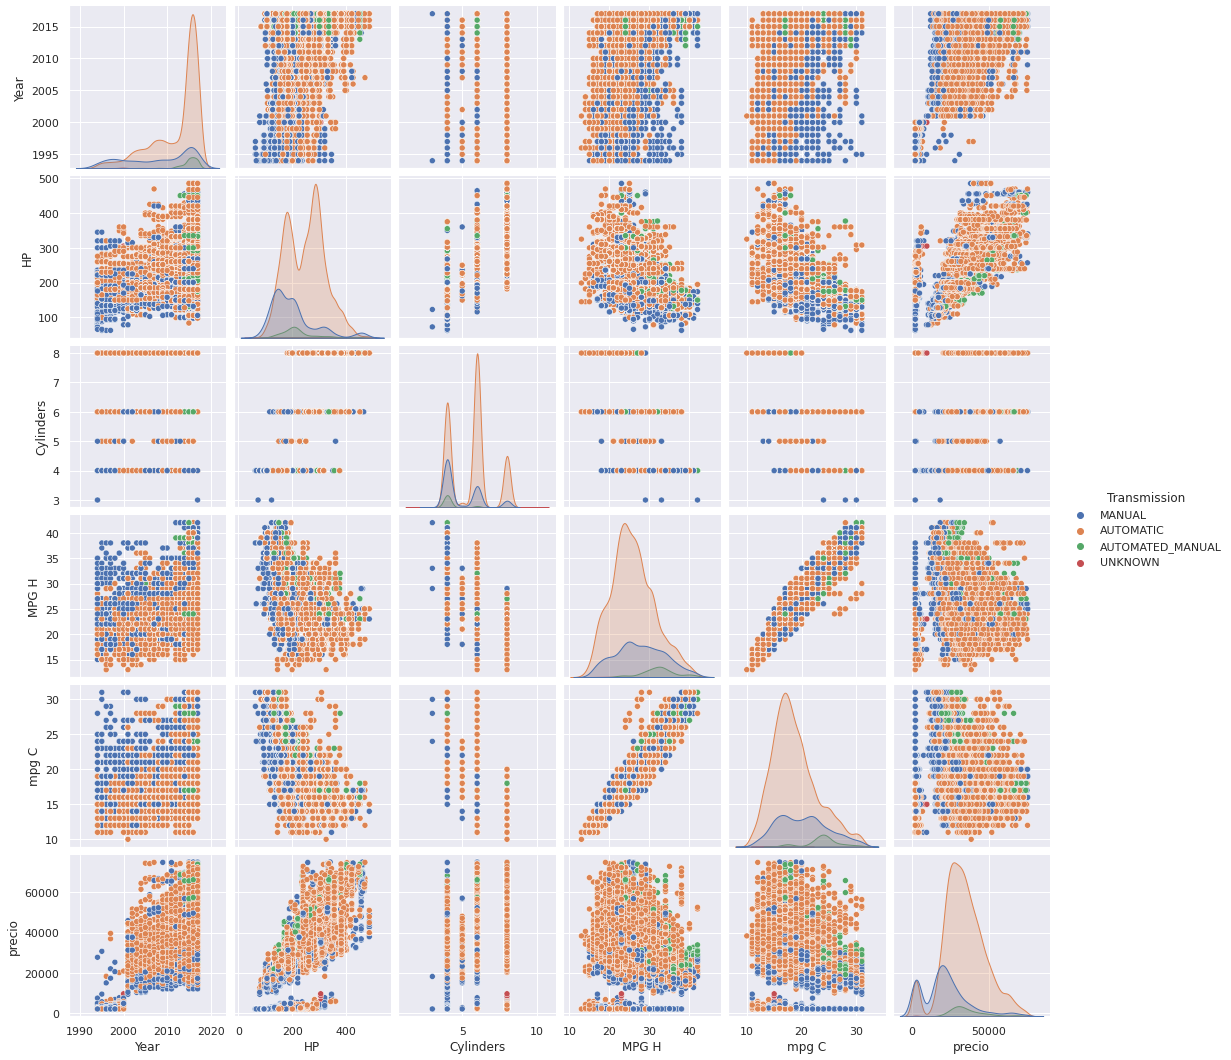

In [22]:
sns.set()
sns.pairplot(df, hue='Transmission' )
df.columns
### ploteamos las correlaciones de las variables numericas en base a el tipo de transmision

In [23]:
df.columns
cant_marcas= set(df["Make"])
len(cant_marcas)
### buscamos la cantidad de marcas que estan en la muestra

38

In [24]:
df.Make.value_counts()
### cantidad de instancias por marca

Chevrolet        1001
Ford              753
Toyota            567
Volkswagen        515
Nissan            512
GMC               466
Dodge             423
Mazda             378
Honda             371
Suzuki            335
Infiniti          322
Cadillac          300
Hyundai           241
Audi              240
Acura             232
Volvo             221
BMW               218
Subaru            214
Kia               211
Buick             180
Mitsubishi        178
Chrysler          173
Mercedes-Benz     170
Lexus             162
Pontiac           148
Lincoln           142
Saab              101
Oldsmobile         91
Land Rover         87
FIAT               58
Scion              55
Plymouth           39
Porsche            38
Lotus              20
HUMMER             17
Alfa Romeo          5
Maserati            4
Genesis             3
Name: Make, dtype: int64

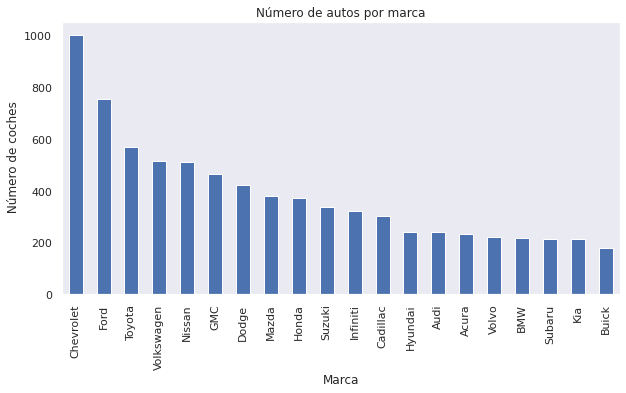

In [25]:
#value_counts(): Devuelve una Serie que contiene recuentos de filas únicas en el DataFrame.
#.nlargest(): Devuelve las primeras n filas con los valores más grandes en las columnas , en orden descendente. Las columnas que no se especifican también se devuelven, pero no se utilizan para ordenar. 
mayores_recuentos=df.Make.value_counts().nlargest(20).plot(kind='bar', figsize=(10,5)) 
plt.title("Número de autos por marca") 
plt.ylabel(' Número de coches') 
plt.xlabel('Marca');
plt.grid()
plt.show()
###ploteamos las 20 marcas con mas instancias

In [26]:
temp= df.corr()
temp
### generamos una tabla de correlacion

,Year,HP,Cylinders,MPG H,mpg C,precio
Year,1.000000,0.326726,-0.133920,0.378479,0.338145,0.592983
HP,0.326726,1.000000,0.715237,-0.443807,-0.544551,0.739042
Cylinders,-0.133920,0.715237,1.000000,-0.703856,-0.755540,0.354013
MPG H,0.378479,-0.443807,-0.703856,1.000000,0.939141,-0.106320
mpg C,0.338145,-0.544551,-0.755540,0.939141,1.000000,-0.180515
precio,0.592983,0.739042,0.354013,-0.106320,-0.180515,1.000000


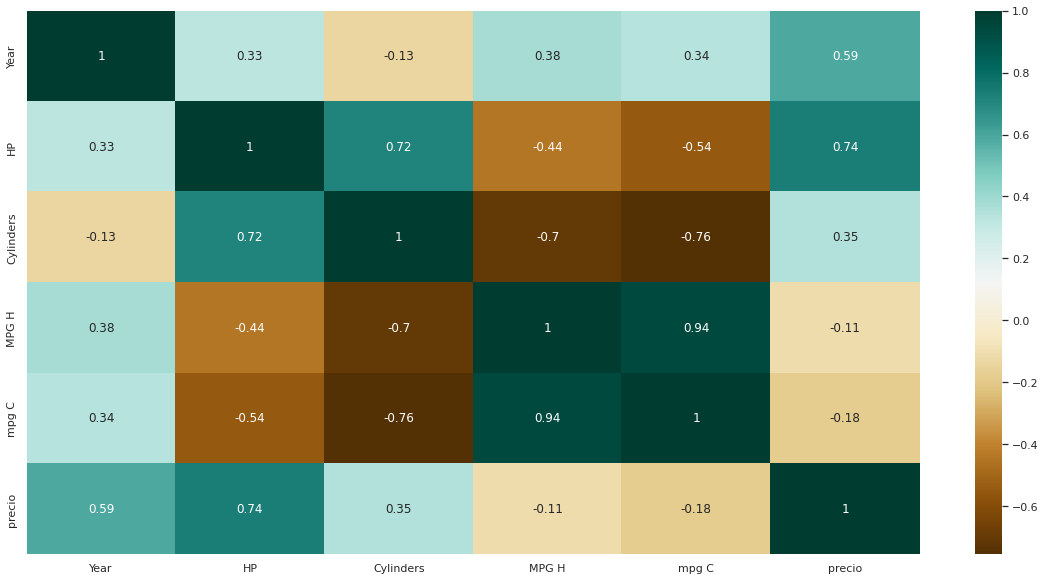

In [27]:
plt.figure(figsize=(20,10)) 
sns.heatmap(temp, cbar = True, annot=True, cmap= "BrBG", )


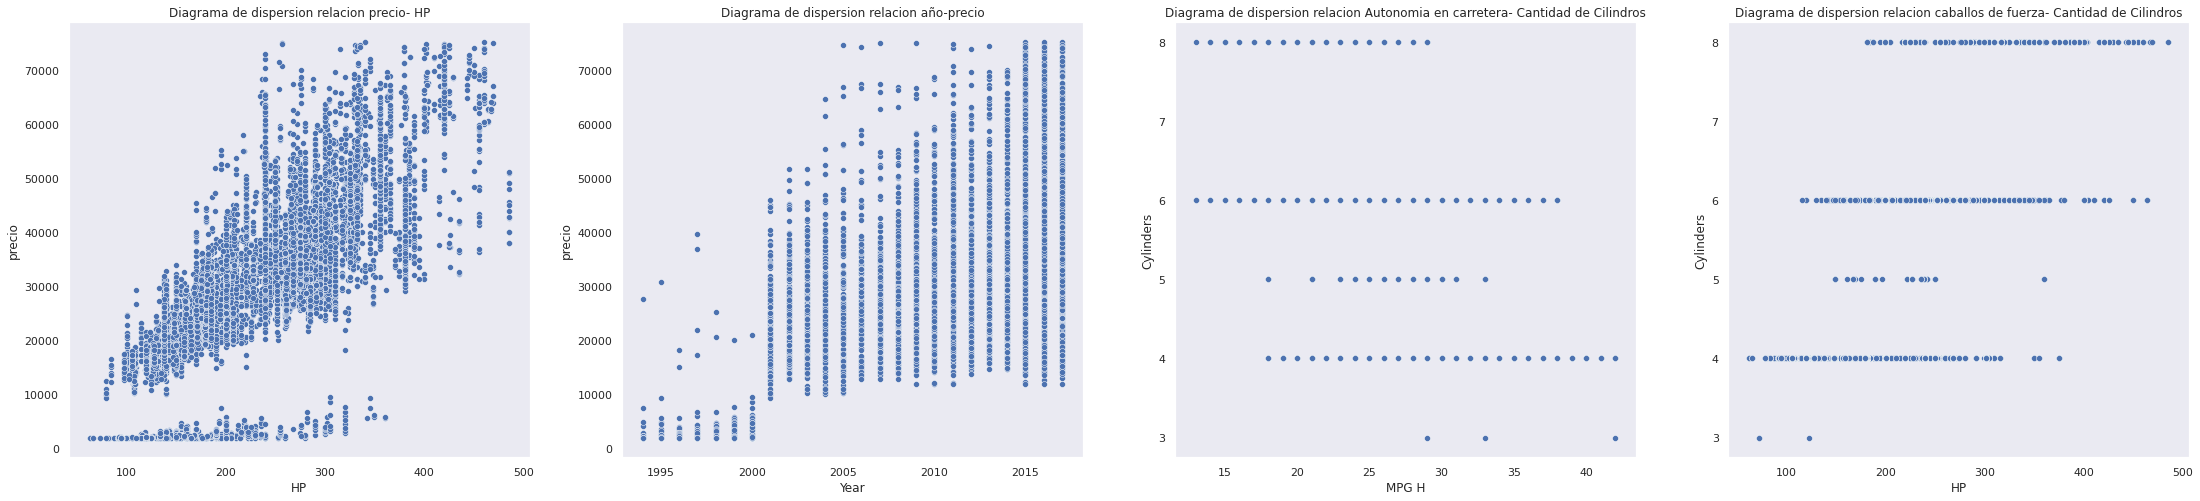

In [28]:
plt.figure(figsize= (38,8))
plt.subplot(1,4,1)
sns.scatterplot(x= "HP" ,y= "precio",data= df)
plt.title("Diagrama de dispersion relacion precio- HP")
plt.grid()

plt.subplot(1,4,2)
sns.scatterplot(x= "Year" ,y= "precio",data= df)
plt.title("Diagrama de dispersion relacion año-precio")
plt.grid()

plt.subplot(1,4,3)
sns.scatterplot(x= "MPG H" ,y= "Cylinders",data= df)
plt.title("Diagrama de dispersion relacion Autonomia en carretera- Cantidad de Cilindros")
plt.grid()

plt.subplot(1,4,4)
sns.scatterplot(x= "HP" ,y= "Cylinders",data= df)
plt.title("Diagrama de dispersion relacion caballos de fuerza- Cantidad de Cilindros")

plt.grid()
plt.show()



In [29]:
recuentos=df["Make"].value_counts().nlargest()
mayores_recuentos=df[df["Make"].isin(["Chevrolet", "Ford", "Toyota", "Volkswagen", "Nissan"])]
print(recuentos)
print(mayores_recuentos.shape)
print(df.shape)
print(np.unique(df["Make"]))
print(len(np.unique(df["Make"])))

Chevrolet     1001
Ford           753
Toyota         567
Volkswagen     515
Nissan         512
Name: Make, dtype: int64
(3348, 10)
(9191, 10)
['Acura' 'Alfa Romeo' 'Audi' 'BMW' 'Buick' 'Cadillac' 'Chevrolet'
 'Chrysler' 'Dodge' 'FIAT' 'Ford' 'GMC' 'Genesis' 'HUMMER' 'Honda'
 'Hyundai' 'Infiniti' 'Kia' 'Land Rover' 'Lexus' 'Lincoln' 'Lotus'
 'Maserati' 'Mazda' 'Mercedes-Benz' 'Mitsubishi' 'Nissan' 'Oldsmobile'
 'Plymouth' 'Pontiac' 'Porsche' 'Saab' 'Scion' 'Subaru' 'Suzuki' 'Toyota'
 'Volkswagen' 'Volvo']
38


In [30]:
print(df["Make"].value_counts())

# df= df[np.int64(df["Make"])]
# labels= np.unique(df["Make"])
# plt.figure(figsize= (20,10))
# plt.pie(df, labels= labels)
# plt.show()


Chevrolet        1001
Ford              753
Toyota            567
Volkswagen        515
Nissan            512
GMC               466
Dodge             423
Mazda             378
Honda             371
Suzuki            335
Infiniti          322
Cadillac          300
Hyundai           241
Audi              240
Acura             232
Volvo             221
BMW               218
Subaru            214
Kia               211
Buick             180
Mitsubishi        178
Chrysler          173
Mercedes-Benz     170
Lexus             162
Pontiac           148
Lincoln           142
Saab              101
Oldsmobile         91
Land Rover         87
FIAT               58
Scion              55
Plymouth           39
Porsche            38
Lotus              20
HUMMER             17
Alfa Romeo          5
Maserati            4
Genesis             3
Name: Make, dtype: int64


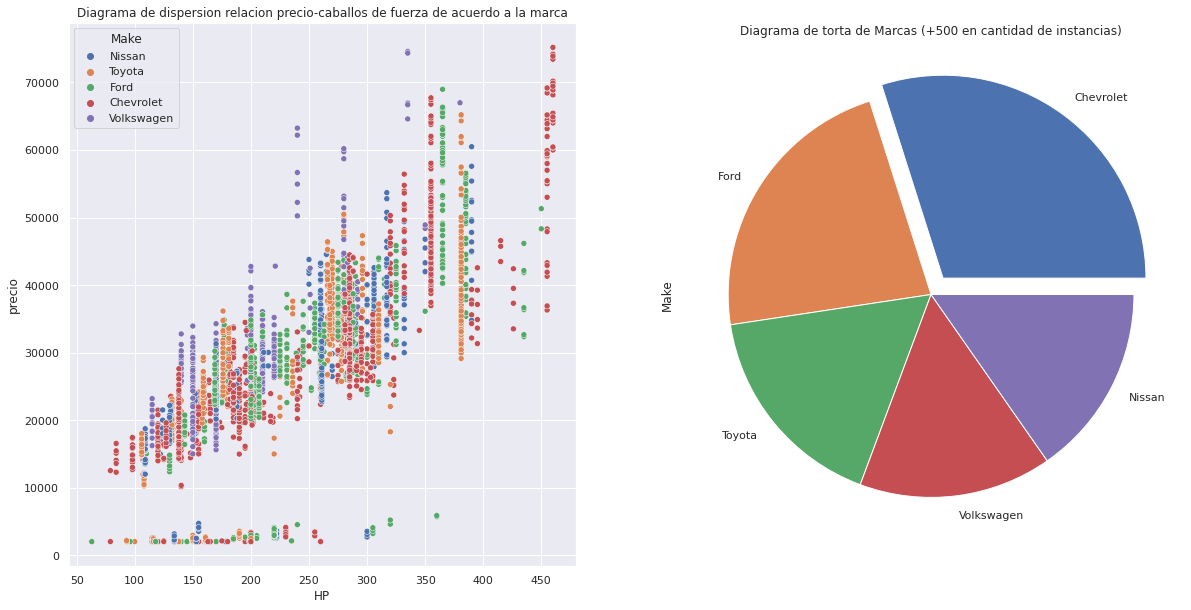

In [31]:
plt.figure(figsize= (30,20))
plt.subplot(1,2,1)
sns.scatterplot(x= "HP" ,y= "precio",data=mayores_recuentos, hue= "Make")
plt.title("Diagrama de dispersion relacion precio-caballos de fuerza de acuerdo a la marca")


plt.subplot(1,2,2)
marcas=df["Make"].value_counts().nlargest().plot(kind='pie', figsize=(20,10), explode= (0.1,0.0,0.0,0.0,0.0)) 
plt.title("Diagrama de torta de Marcas (+500 en cantidad de instancias)")

plt.show()


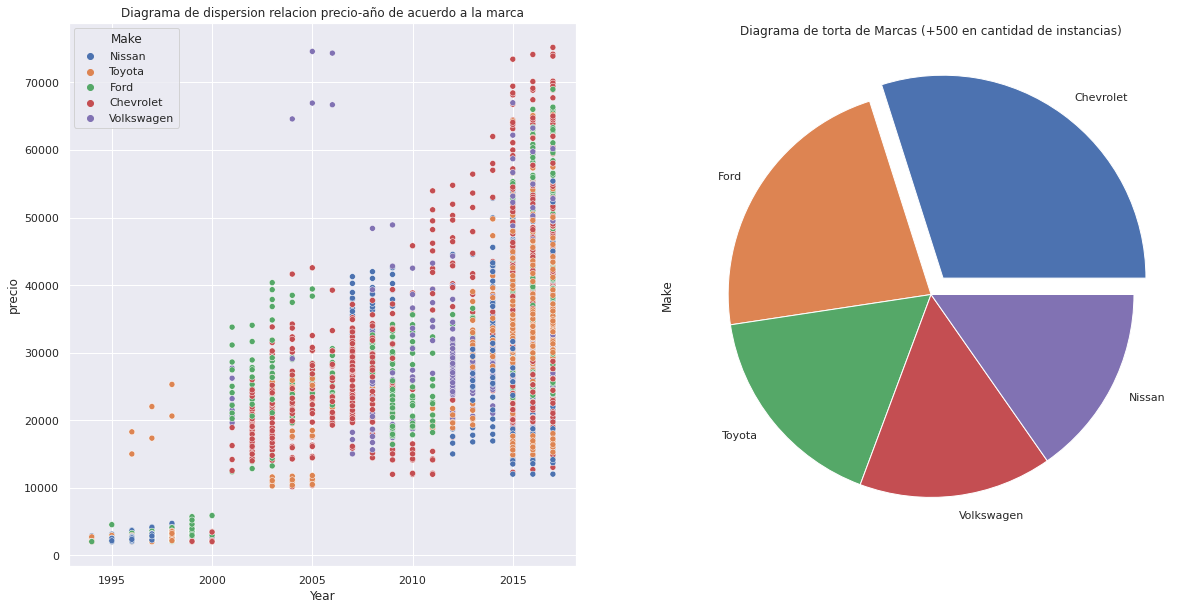

In [32]:
plt.figure(figsize= (30,20))
plt.subplot(1,2,1)
sns.scatterplot(x= "Year" ,y= "precio",data=mayores_recuentos, hue= "Make")
plt.title("Diagrama de dispersion relacion precio-año de acuerdo a la marca")


plt.subplot(1,2,2)
marcas=df["Make"].value_counts().nlargest().plot(kind='pie', figsize=(20,10), explode= (0.1,0.0,0.0,0.0,0.0)) 
plt.title("Diagrama de torta de Marcas (+500 en cantidad de instancias)")

plt.show()

## BMW

In [ ]:
# separamos los valores "BMW" y creamos una variable con ese dataset de esos valores
bmw= df.loc[df["Make (hecho/fabricado en)"].isin(["BMW"])]
bmw.head()

,Make (hecho/fabricado en),Model (modelo),Year (hecho en el año),Engine Fuel Type (tipo de combustible del motor),Engine HP (caballos de fuerza),Engine Cylinders (cilindros del motor),Transmission Type (tipo de transmision),Driven_Wheels (ruedas motrices),Number of Doors (numero de puertas),Market Category (categoria del mercado),Vehicle Size (tamaño del vehiculo),Vehicle Style (estilo del vehiculo),highway MPG (MPG(millas x galon) en carretera),city mpg (MPG en ciudad),Popularity (popularidad),MSRP (etiqueta de precio Monroney)
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [ ]:
bmw.nunique()

Make (hecho/fabricado en)                             1
Model (modelo)                                       39
Year (hecho en el año)                               18
Engine Fuel Type (tipo de combustible del motor)      5
Engine HP (caballos de fuerza)                       37
Engine Cylinders (cilindros del motor)                5
Transmission Type (tipo de transmision)               4
Driven_Wheels (ruedas motrices)                       3
Number of Doors (numero de puertas)                   2
Market Category (categoria del mercado)              17
Vehicle Size (tamaño del vehiculo)                    3
Vehicle Style (estilo del vehiculo)                   7
highway MPG (MPG(millas x galon) en carretera)       27
city mpg (MPG en ciudad)                             22
Popularity (popularidad)                              1
MSRP (etiqueta de precio Monroney)                  263
dtype: int64

In [ ]:
# BMW con mayor autonomia
carretera_max=bmw["highway MPG (MPG(millas x galon) en carretera)"]. max()
ciudad_max=bmw["city mpg (MPG en ciudad)"]. max()
temp= bmw[(bmw["highway MPG (MPG(millas x galon) en carretera)"]== carretera_max)]
mayor_autonomia= temp["city mpg (MPG en ciudad)"].max()
tab_mayor_autonomia= bmw[(bmw["highway MPG (MPG(millas x galon) en carretera)"]== carretera_max) & (bmw["city mpg (MPG en ciudad)"]== mayor_autonomia)]
tab_mayor_autonomia= tab_mayor_autonomia[['Model (modelo)', 'Year (hecho en el año)',
       'Engine Fuel Type (tipo de combustible del motor)', 'Engine HP (caballos de fuerza)',
       'highway MPG (MPG(millas x galon) en carretera)',
       'city mpg (MPG en ciudad)']]      
tab_mayor_autonomia
                                                        

,Model (modelo),Year (hecho en el año),Engine Fuel Type (tipo de combustible del motor),Engine HP (caballos de fuerza),highway MPG (MPG(millas x galon) en carretera),city mpg (MPG en ciudad)
5790,i3,2015,electric,170.0,111,137
5791,i3,2016,electric,170.0,111,137
5792,i3,2017,electric,170.0,111,137


In [ ]:
bmw[["Year (hecho en el año)","Engine HP (caballos de fuerza)", "Engine Cylinders (cilindros del motor)", "Number of Doors (numero de puertas)", "highway MPG (MPG(millas x galon) en carretera)", "city mpg (MPG en ciudad)", "Popularity (popularidad)", "MSRP (etiqueta de precio Monroney)"]].corr()

,Year (hecho en el año),Engine HP (caballos de fuerza),Engine Cylinders (cilindros del motor),Number of Doors (numero de puertas),highway MPG (MPG(millas x galon) en carretera),city mpg (MPG en ciudad),Popularity (popularidad),MSRP (etiqueta de precio Monroney)
Year (hecho en el año),1.000000,0.099026,-0.313158,0.369248,0.231427,0.149942,NaN,0.255274
Engine HP (caballos de fuerza),0.099026,1.000000,0.769609,0.068773,-0.499719,-0.359865,NaN,0.829365
Engine Cylinders (cilindros del motor),-0.313158,0.769609,1.000000,-0.076864,-0.699800,-0.572449,NaN,0.539538
Number of Doors (numero de puertas),0.369248,0.068773,-0.076864,1.000000,0.141227,0.142724,NaN,0.133500
highway MPG (MPG(millas x galon) en carretera),0.231427,-0.499719,-0.699800,0.141227,1.000000,0.965325,NaN,-0.310246
city mpg (MPG en ciudad),0.149942,-0.359865,-0.572449,0.142724,0.965325,1.000000,NaN,-0.208388
Popularity (popularidad),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MSRP (etiqueta de precio Monroney),0.255274,0.829365,0.539538,0.133500,-0.310246,-0.208388,NaN,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


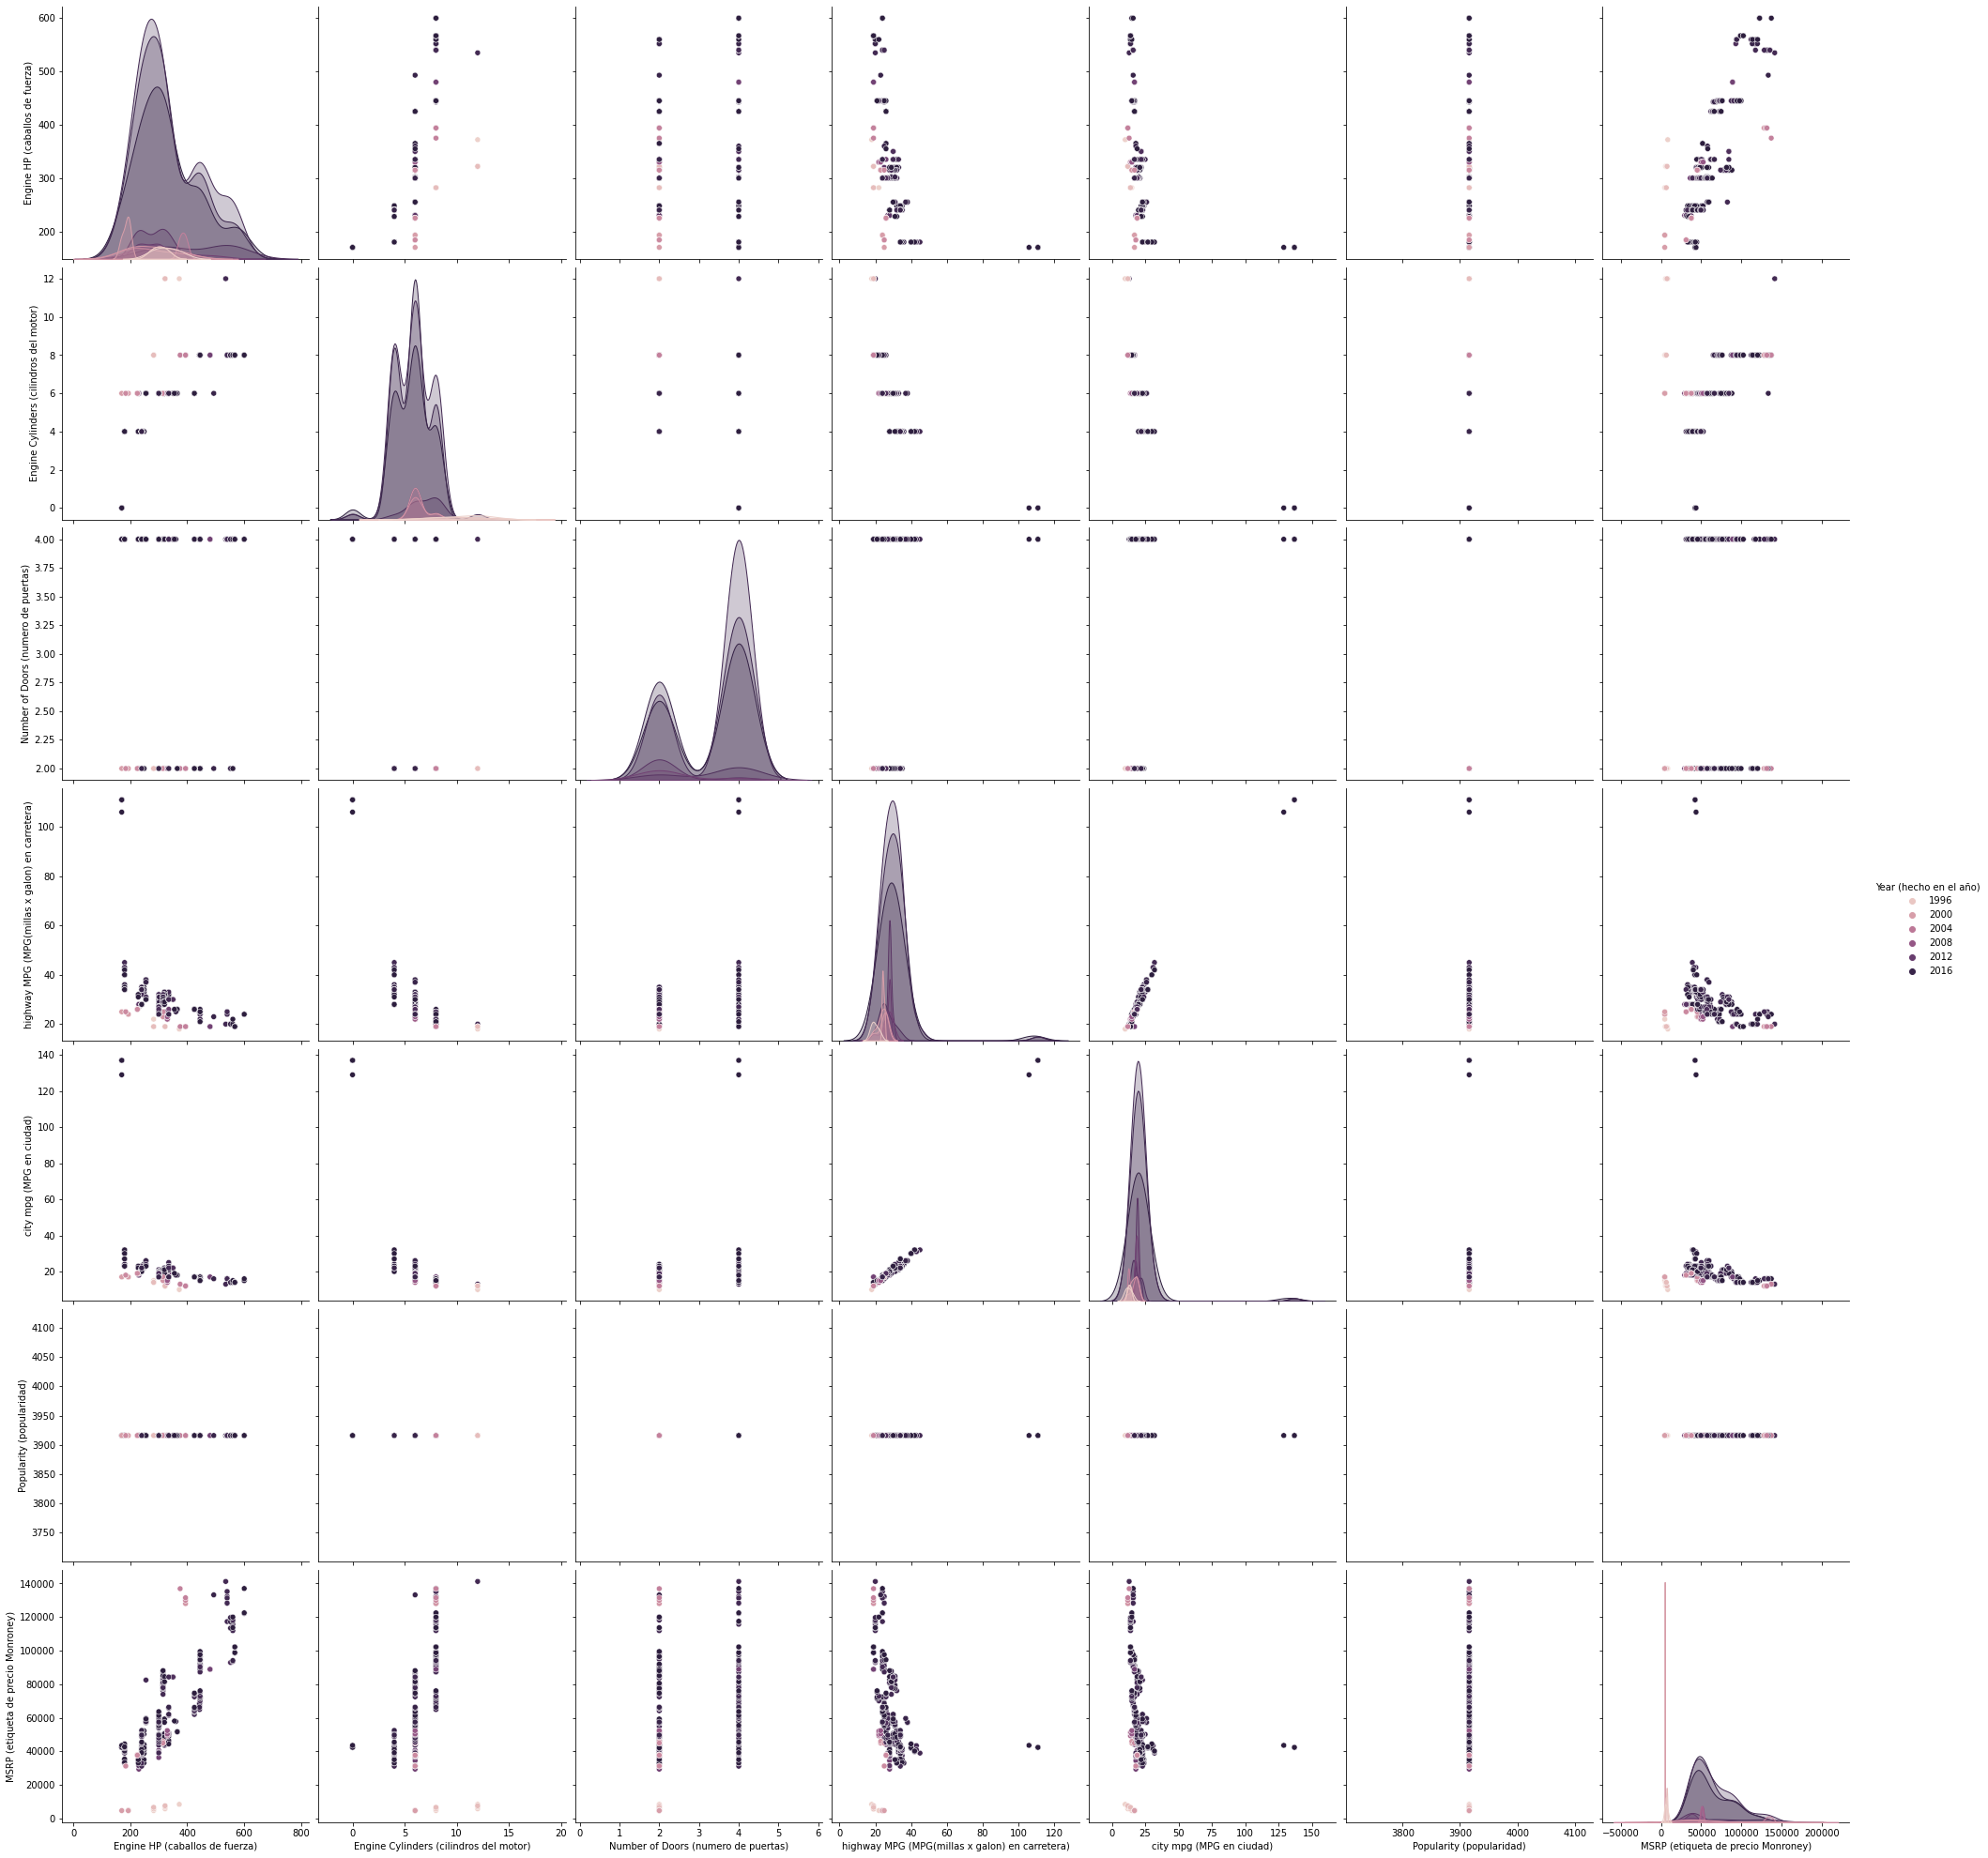

In [ ]:
sns.pairplot(bmw, hue="Year (hecho en el año)", dropna= True, size= 4)

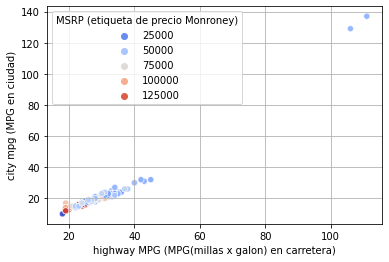

In [ ]:
# relacion mpg en carretera- mpg en ciudad con precio
sns.scatterplot(x= "highway MPG (MPG(millas x galon) en carretera)", y= "city mpg (MPG en ciudad)", data= bmw, hue= "MSRP (etiqueta de precio Monroney)", palette= "coolwarm")
plt.grid()
plt.show()

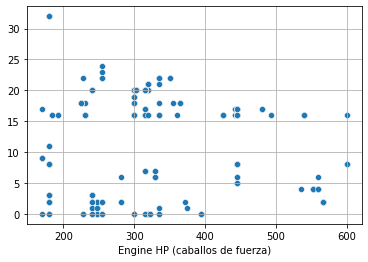

In [ ]:
# relacion autonomia- caballos de fuerza

sns.scatterplot(x= "Engine HP (caballos de fuerza)", y = (bmw["city mpg (MPG en ciudad)"] & bmw["highway MPG (MPG(millas x galon) en carretera)"]), data= bmw)

plt.grid()
plt.show()

In [ ]:
df["MSRP (etiqueta de precio Monroney)"].max()
df["MSRP (etiqueta de precio Monroney)"].min()
df["MSRP (etiqueta de precio Monroney)"].mean()



6049

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


TypeError: ignored

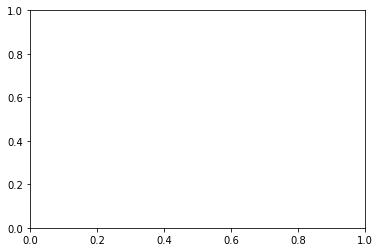

In [ ]:
sns.catplot(data= df, x= "country", y= "points", size= 10)